# IMDB Movie Review Sentiment Analysis Using Keras

In [50]:
# Imports
import numpy as np
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import GridSearchCV
%matplotlib inline

np.random.seed(1987)

### Load the dataset

The IMDB movie review dataset comes preloaded with Keras. We have the ability to select the number of words for each review as a parameter.

In [76]:
# Loading the data (it's preloaded in Keras)
(X_train, y_train), (X_test, y_test) = imdb.load_data()

print(X_train.shape)
print(X_test.shape)

(25000,)
(25000,)


In [77]:
print(X_train[0])
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [61]:
lengths = [len(i) for i in X_train]
len(max(X_train,key=len))

2494

### Preprocessing the data

In [62]:
tokenizer = Tokenizer(num_words=3000)
X_train = tokenizer.sequences_to_matrix(X_train, mode='binary')
X_test = tokenizer.sequences_to_matrix(X_test, mode='binary')
print(X_train[1])

[0. 1. 0. ... 0. 0. 0.]


### Model Architecture and GridSearchCV

In [18]:
def plot_performance(history):
    plt.figure(figsize=(15,15))
    plt.subplot(211)  
    plt.plot(history.history['acc'])  
    plt.plot(history.history['val_acc'])  
    plt.title('model accuracy')  
    plt.ylabel('accuracy')  
    plt.xlabel('epoch')  
    plt.legend(['train', 'test'], loc='upper left')  
    
    plt.subplot(212)  
    plt.plot(history.history['loss'])  
    plt.plot(history.history['val_loss'])  
    plt.title('model loss')  
    plt.ylabel('loss')  
    plt.xlabel('epoch')  
    plt.legend(['train', 'test'], loc='upper left')  
    plt.show()

In [ ]:
# def build_classifier(optimizer):
#     classifier = Sequential()
#     classifier.add(Dense(units = 32, activation = 'relu', input_shape = X_train.shape[1:]))
#     classifier.add(Dense(units = 64, activation = 'relu'))
#     classifier.add(Dense(units = 128, activation = 'relu'))
#     classifier.add(Dense(units = 2, activation = 'sigmoid'))
#     classifier.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#     return classifier

# parameters = {'batch_size': [25, 32],
#               'epochs': [100, 300],
#               'optimizer': ['adam', 'rmsprop']}

In [ ]:
# classifier = KerasClassifier(build_fn = build_classifier)
# grid_search = GridSearchCV(estimator = classifier,
#                            param_grid = parameters,
#                            scoring = 'accuracy',
#                            cv = 5)

In [ ]:
# grid_search = grid_search.fit(X_train, y_train)

In [ ]:
# grid_search.best_params_

### Applying optimal params to model training

In [63]:
num_classes = 2
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)
print(y_test.shape)

(25000, 2)
(25000, 2)


In [64]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=1987)

In [65]:
opt_model = Sequential()
opt_model.add(Dropout(0.2, input_shape = X_train.shape[1:]))
opt_model.add(Dense(units = 1024, activation = 'relu'))
opt_model.add(Dropout(0.6))
opt_model.add(Dense(units = 2, activation = 'sigmoid'))
opt_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_5 (Dropout)          (None, 3000)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              3073024   
_________________________________________________________________
dropout_6 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 2050      
Total params: 3,075,074
Trainable params: 3,075,074
Non-trainable params: 0
_________________________________________________________________


In [66]:
from keras import optimizers

adam = optimizers.Adam(lr = 0.00001)
opt_model.compile(loss = "binary_crossentropy", 
                    optimizer = adam, 
                    metrics=["accuracy"])

epochs=50
batch_size=32

In [67]:
opt_model_history = opt_model.fit(X_train, y_train, 
          validation_data=(X_val, y_val),
          epochs=epochs, batch_size=batch_size, verbose=1)

Train on 16750 samples, validate on 8250 samples
Epoch 1/50
16750/16750 [==============================] - 16s 959us/step - loss: 0.6836 - acc: 0.5586 - val_loss: 0.6434 - val_acc: 0.7059
Epoch 2/50
16750/16750 [==============================] - 16s 935us/step - loss: 0.6301 - acc: 0.6663 - val_loss: 0.5967 - val_acc: 0.7891
Epoch 3/50
16750/16750 [==============================] - 16s 933us/step - loss: 0.5862 - acc: 0.7291 - val_loss: 0.5528 - val_acc: 0.8176
Epoch 4/50
16750/16750 [==============================] - 16s 929us/step - loss: 0.5426 - acc: 0.7699 - val_loss: 0.5116 - val_acc: 0.8356
Epoch 5/50
16750/16750 [==============================] - 16s 948us/step - loss: 0.5034 - acc: 0.7984 - val_loss: 0.4748 - val_acc: 0.8444
Epoch 6/50
16750/16750 [==============================] - 16s 947us/step - loss: 0.4685 - acc: 0.8166 - val_loss: 0.4435 - val_acc: 0.8521
Epoch 7/50
16750/16750 [==============================] - 16s 974us/step - loss: 0.4421 - acc: 0.8305 - val_loss: 0.4

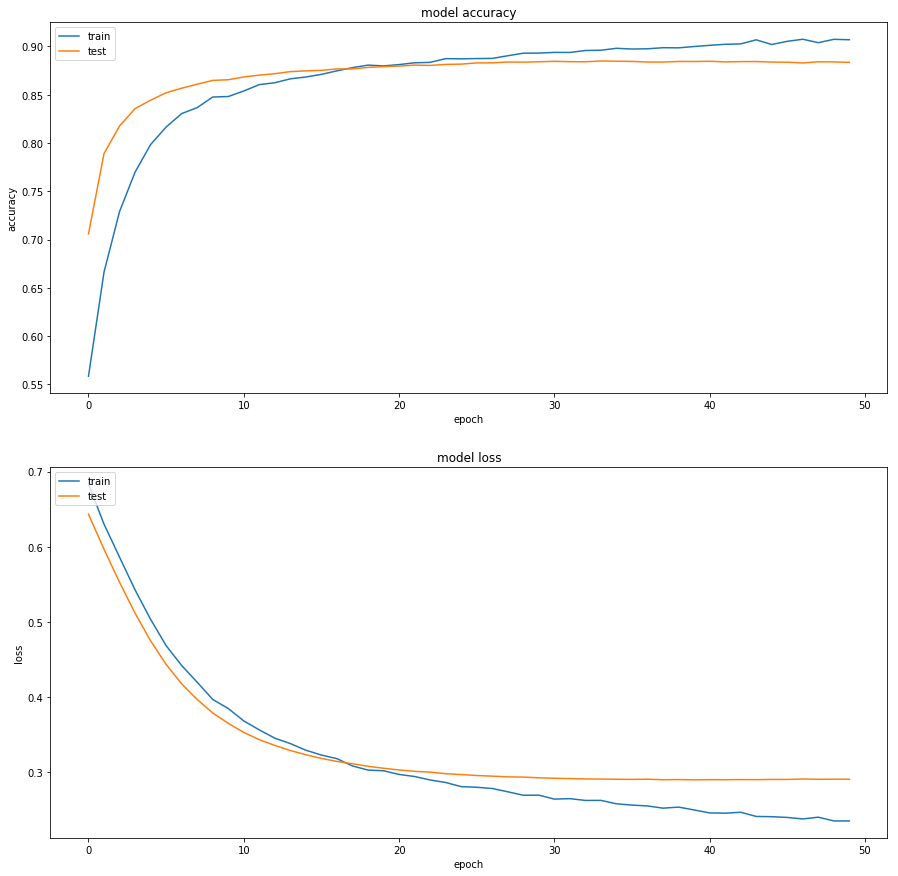

In [68]:
plot_performance(opt_model_history)

In [69]:
score = opt_model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: ", score[1])

Accuracy:  0.8831
